# Huang1980Model for Image-Derived Input Functions and Twilite Data

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from Huang1980Model import Huang1980Model

In [2]:
# define data & models
petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "CCIR_01211", "derivatives", "sub-108293", "ses-20210421155709", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif_dynesty-Boxcar-ideal-plasma.nii.gz")
#idif = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif_dynesty-Boxcar-ideal-embed.nii.gz")
#idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-ho_proc-MipIdif_idif.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal-plasma.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal-embed.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-165-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

mm_twil = Huang1980Model(twil, 
                     pet,
                     truths=[0.490, 0.080, 0.003 , 0.001, 8.97, -44.221, 0.021], 
                     nlive=100,
                     tag="main7-rc1p85-vrc1-3000")
mm_idif = Huang1980Model(idif, 
                     pet,
                     truths=[0.395, 0.134, 0.004, 0.002, 10.9, -44, 0.015],
                     nlive=100,
                     tag="main7-rc1p85-vrc1-3000")

parc_index = 6

RadialArtery: found data for tracer fdg
{'fqfp': '/Users/jjlee/Singularity/CCIR_01211/derivatives/sub-108293/ses-20210421155709/pet/sub-108293_ses-20210421155709_trc-fdg_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal-plasma',
 'halflife': 6586.236,
 'img': array([   0.       ,    0.       ,    0.       , ..., 1236.9296875,
       1236.9296875, 1236.9296875]),
 'nii': <nibabel.nifti1.Nifti1Image object at 0x17768a160>,
 'taus': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 

## Inspect Huang1980Model twil

In [3]:
v = mm_twil.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_twil.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.49, 0.08, 0.003, 0.001, 8.97, -44.221, 0.021]
'==================================== data ===================================='
{'halflife': 6586.236,
 'inputFuncInterp': array([0.        , 0.        , 0.        , ..., 0.08944957, 0.08944957,
       0.08944957]),
 'martinv1': array([0.02563652]),
 'raichleks': array([ 8.90147407e-03,  9.12127912e-01,  3.50093865e-03,  5.39525223e+00,
       -1.12716045e+01,  8.33573937e-03]),
 'rho': array([0.00926145, 0.00900305, 0.00917614, 0.00882938, 0.00901075,
       0.01037357, 0.01427835, 0.02194573, 0.03362954, 0.05048546,
       0.06869451, 0.09041399, 0.11290587, 0.1335597 , 0.15296682,
       0.16778646, 0.17882041, 0.18776847, 0.18950908, 0.18496999,
       0.17763947, 0.17401859, 0.16497652, 0.14643556, 0.13911767,
       0.1353519 , 0.13129423, 0.12940735, 0.12840854, 0.12845873,
       0.12845873, 0.12985383, 0.1305015 , 0.130657  , 0.13103626,
       0.1

In [4]:
pprint("============================== mm_twil.data2t(data) ===============================")
pprint(mm_twil.data2t(data))
pprint("============================= mm_twil.data2taus(data) =============================")
pprint(mm_twil.data2taus(data))
pprint("=========================== mm_twil.data2timesMid(data) ===========================")
pprint(mm_twil.data2timesMid(data))
pprint("================================== mm_twil.fqfp ===================================")
pprint(mm_twil.fqfp)
pprint("========================== mm_twil.input_function() =========================")
pprint(mm_twil.input_function())
pprint("================================= mm_twil.labels ==================================")
pprint(mm_twil.labels)
pprint("====================== mm_twil.load_nii(mm_twil.fqfp + '.nii.gz') ======================")
pprint(mm_twil.load_nii(mm_twil.fqfp + ".nii.gz"))
pprint("=============================== mm_twil.loglike(v) ================================")
pprint(mm_twil.loglike(v))
pprint("================================== mm_twil.ndim ===================================")
pprint(mm_twil.ndim)
pprint("========================= mm_twil.parse_halflife(mm_twil.fqfp) =========================")
pprint(mm_twil.parse_halflife(mm_twil.fqfp))
pprint("========================= mm_twil.parse_isotope(mm_twil.fqfp) ==========================")
pprint(mm_twil.parse_isotope(mm_twil.fqfp))
pprint("================================== mm_twil.sigma ==================================")
pprint(mm_twil.sigma)
pprint("============================ mm_twil.signalmodel(data) ============================")
pprint(mm_twil.signalmodel(data))

('============================== mm_twil.data2t(data) '
 '===============================')
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.597e+03, 3.598e+03,
       3.599e+03])
('============================= mm_twil.data2taus(data) '
 '=============================')
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10.

## Plot Huang1980Model twil

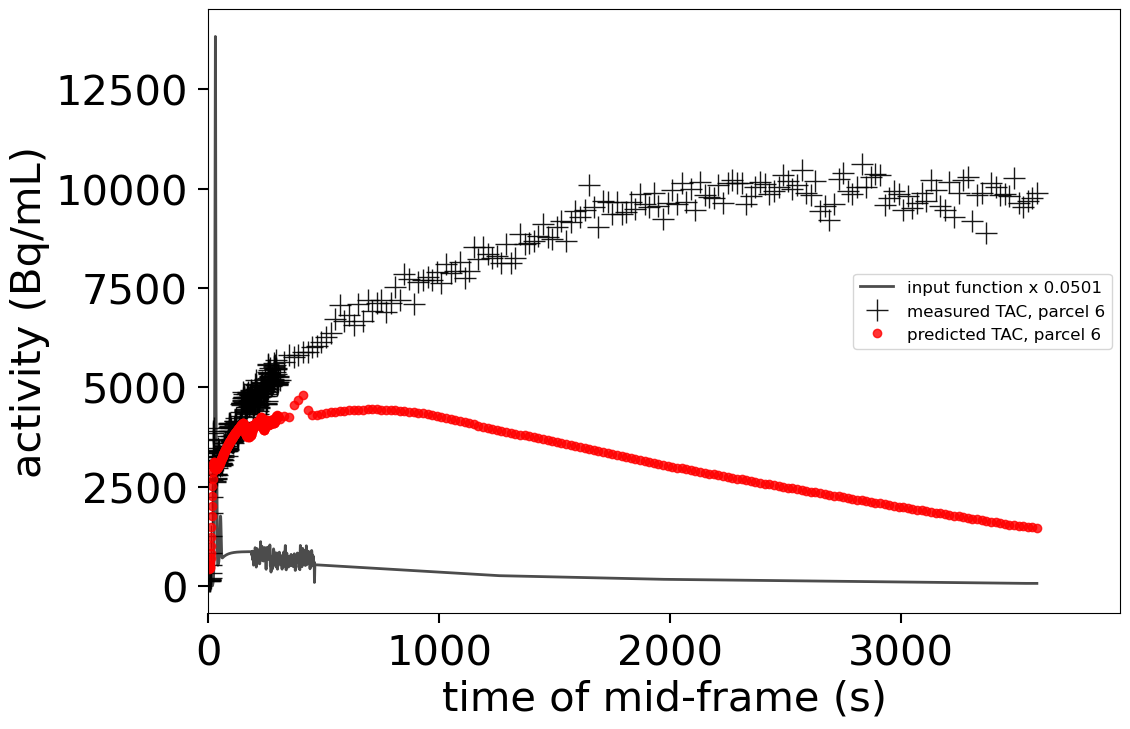

In [5]:
mm_twil.plot_truths(parc_index=parc_index)

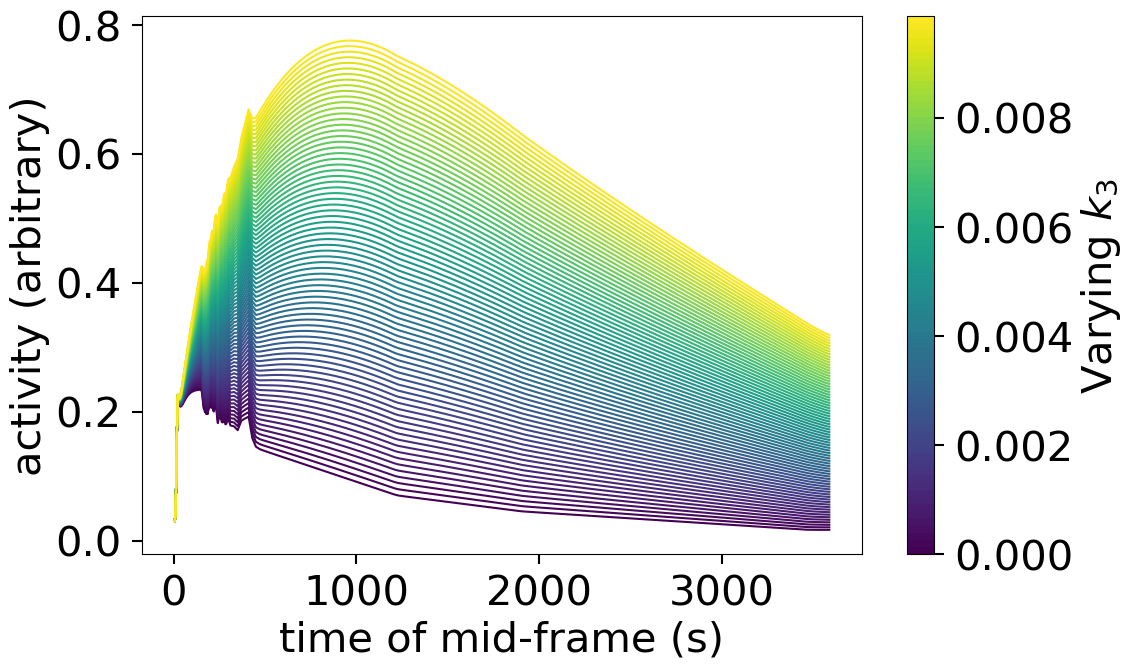

In [6]:
mm_twil.plot_variations(2, 0, 0.01 , mm_twil.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_twil = mm_twil.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_twil.save_results(res_twil, "playground-for-H1980M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_twil.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

## Inspect Huang1980Model idif

In [ ]:
v = mm_idif.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_idif.data(v)
pprint("==================================== data ====================================")
pprint(data)

In [ ]:
pprint("============================== mm_idif.data2t(data) ===============================")
pprint(mm_idif.data2t(data))
pprint("============================= mm_idif.data2taus(data) =============================")
pprint(mm_idif.data2taus(data))
pprint("=========================== mm_idif.data2timesMid(data) ===========================")
pprint(mm_idif.data2timesMid(data))
pprint("================================== mm_idif.fqfp ===================================")
pprint(mm_idif.fqfp)
pprint("========================== mm_idif.input_function() =========================")
pprint(mm_idif.input_function())
pprint("================================= mm_idif.labels ==================================")
pprint(mm_idif.labels)
pprint("====================== mm_idif.load_nii(mm_idif.fqfp + '.nii.gz') ======================")
pprint(mm_idif.load_nii(mm_idif.fqfp + ".nii.gz"))
pprint("=============================== mm_idif.loglike(v) ================================")
pprint(mm_idif.loglike(v))
pprint("================================== mm_idif.ndim ===================================")
pprint(mm_idif.ndim)
pprint("========================= mm_idif.parse_halflife(mm_idif.fqfp) =========================")
pprint(mm_idif.parse_halflife(mm_idif.fqfp))
pprint("========================= mm_idif.parse_isotope(mm_idif.fqfp) ==========================")
pprint(mm_idif.parse_isotope(mm_idif.fqfp))
pprint("================================== mm_idif.sigma ==================================")
pprint(mm_idif.sigma)
pprint("============================ mm_idif.signalmodel(data) ============================")
pprint(mm_idif.signalmodel(data))

## Plot Huang1980Model idif

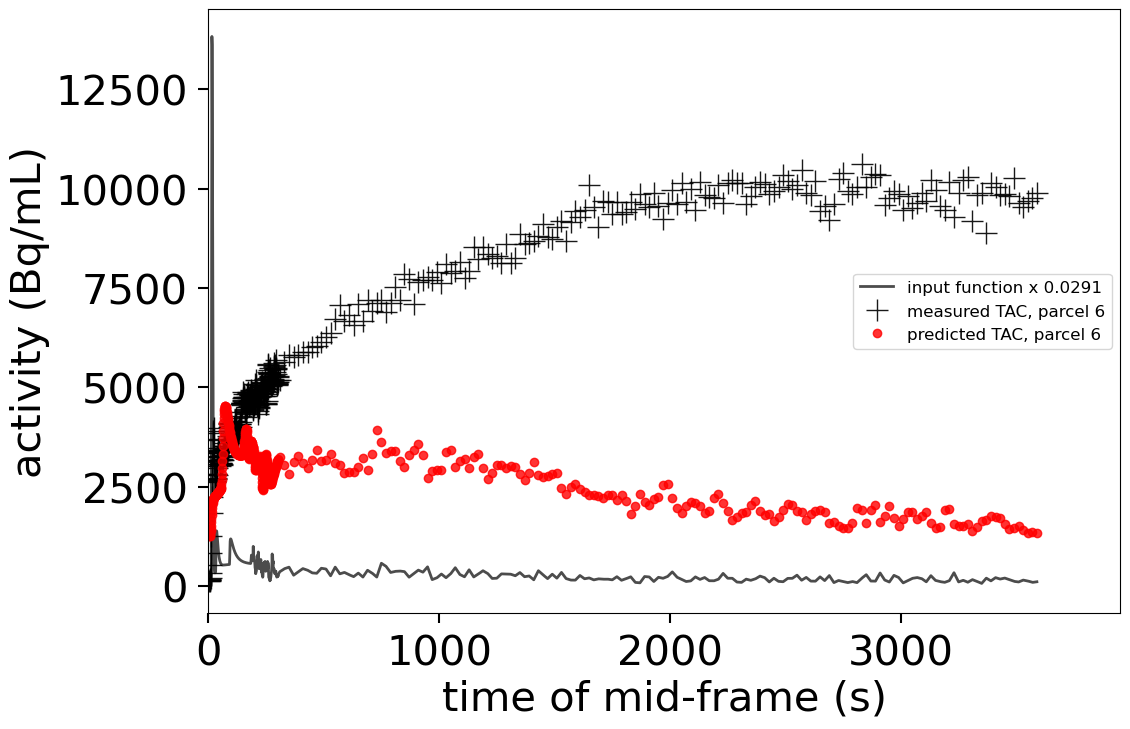

In [7]:
mm_idif.plot_truths(parc_index=parc_index)

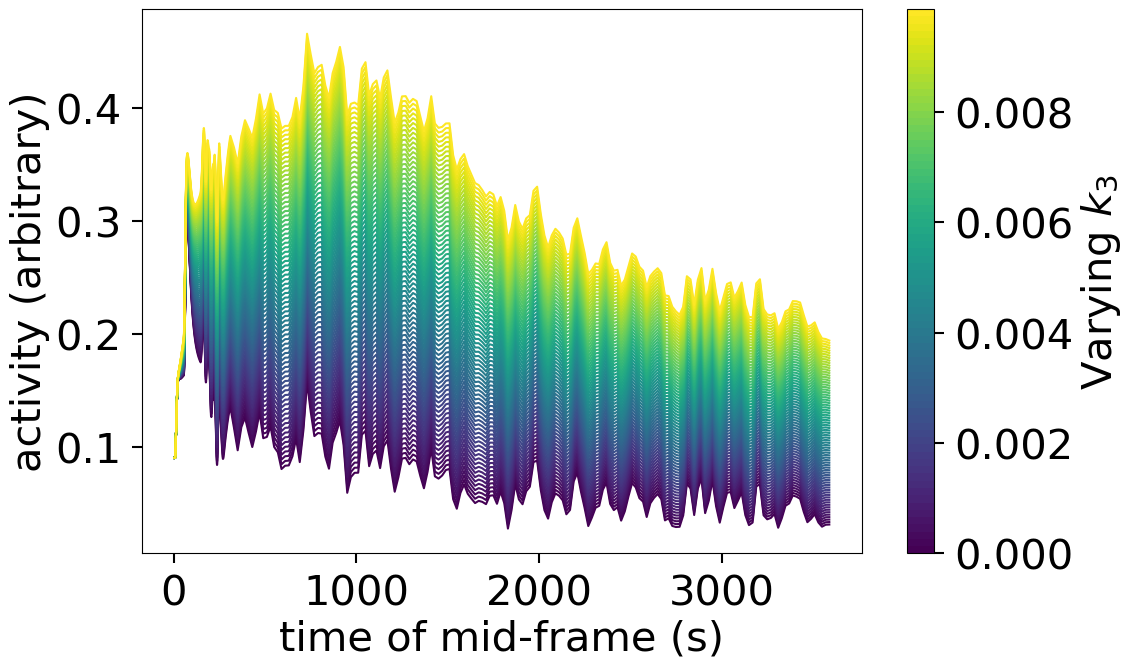

In [8]:
mm_idif.plot_variations(2, 0, 0.01 , mm_idif.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_idif = mm_idif.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_idif.save_results(res_idif, "playground-for-H1980M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_idif.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results